# Fifa Player Analysis 

In [17]:
#importing The libraries 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error



In [18]:
df=pd.read_csv('fifa22.csv')

df.head(20)


,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,L. Messi,2022,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,R. Lewandowski,2022,ST,92,92,119500000.0,270000.0,32,185,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,Cristiano Ronaldo,2022,"ST, LW",91,91,45000000.0,270000.0,36,187,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,Neymar Jr,2022,"LW, CAM",91,91,129000000.0,270000.0,29,175,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,K. De Bruyne,2022,"CM, CAM",91,91,125500000.0,350000.0,30,181,...,89,68,65,53,15,13,5,10,13,NaN
5,200389,J. Oblak,2022,GK,91,93,112000000.0,130000.0,28,188,...,68,27,12,18,87,92,78,90,90,50.0
6,231747,K. Mbappé,2022,"ST, LW",91,95,194000000.0,230000.0,22,182,...,88,26,34,32,13,5,7,11,6,NaN
7,167495,M. Neuer,2022,GK,90,90,13500000.0,86000.0,35,193,...,70,17,10,11,88,88,91,89,88,56.0
8,192448,M. ter Stegen,2022,GK,90,92,99000000.0,250000.0,29,187,...,70,25,13,10,88,85,88,88,90,43.0
9,202126,H. Kane,2022,ST,90,90,129500000.0,240000.0,27,188,...,91,50,36,38,8,10,11,14,11,NaN


In [19]:
# Checking for null values 
df.isna().any()

sofifa_id                      False
short_name                     False
year                           False
player_positions               False
overall                        False
potential                      False
value_eur                       True
wage_eur                        True
age                            False
height_cm                      False
weight_kg                      False
club_name                       True
league_name                     True
league_level                    True
club_position                   True
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
pace                            True
shooting                        True
passing                         True
dribbling                       True
defending                       True
physic                          True
attacking_crossing             False
attacking_finishing            False
a

In [20]:
count_null=len(df[(df['value_eur'].isnull()) & (df['wage_eur'].isnull())])
count_null

61

In [21]:
# dropping null values for colums of value_eur and wage_eur since its irrelevent as they are low level players 

df.dropna(subset=['value_eur','wage_eur'],inplace=True)

In [22]:
df.isna().any()

sofifa_id                      False
short_name                     False
year                           False
player_positions               False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
club_name                      False
league_name                    False
league_level                   False
club_position                  False
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
pace                            True
shooting                        True
passing                         True
dribbling                       True
defending                       True
physic                          True
attacking_crossing             False
attacking_finishing            False
a

In [23]:
## replacing null with 0 for pace,shooting,drinbbling,defending,physic as it doesnt apply for gk and the gk speed doensnt apply for those in other position

df.fillna({'pace':0,'shooting':0,'passing':0,'dribbling':0,'defending':0,'physic':0,'goalkeeping_speed':0}, inplace=True)

In [24]:
df.isna().any()

sofifa_id                      False
short_name                     False
year                           False
player_positions               False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
club_name                      False
league_name                    False
league_level                   False
club_position                  False
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
pace                           False
shooting                       False
passing                        False
dribbling                      False
defending                      False
physic                         False
attacking_crossing             False
attacking_finishing            False
a

In [25]:
print(df.columns)

Index(['sofifa_id', 'short_name', 'year', 'player_positions', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_name', 'league_name', 'league_level', 'club_position',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composur

In [26]:
median_value = df['overall'].median()
print(median_value)

66.0


In [27]:
mode_value = df['overall'].mode()
mode_value

0    65
Name: overall, dtype: int64

In [28]:
mean_value = df['overall'].mean()
mean_value

65.76018784242108

# Finding the distribution of overall rating in the dataset 

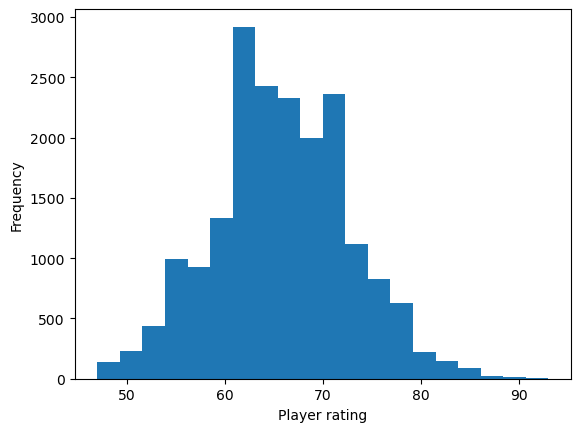

In [29]:

import matplotlib.pyplot as plt
plt.hist(df['overall'], bins=20)
plt.xlabel('Player rating')
plt.ylabel('Frequency')
plt.show()

In [30]:

# Calculating the skewness of player ratings
skewness = df['overall'].skew()

print('the skewness of the player rating is ',skewness)

the skewness of the player rating is  0.08353358425546382


Here the skewness is 0.08 ,it indicates a very small deviation from a perfectly symmetric distribution. Skewness measures the asymmetry of the distribution of data points

# Finding top 10 players in each position

Here we are finding the best players in each position by considering the columns that are having higest corelation to overall rating based on positions . we select those columns and find the mean rating for each player from these columns and sorted it out to find the top 10 players in each position.

# Finding best forward players 

Forward position feature selection

In [31]:
## selcting the columns to anayse forwards
forward=df[df['club_position'].isin(['FW', 'ST', 'LW', 'RW','LF','RF'])]

forward

,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,L. Messi,2022,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,...,96,20,35,24,6,11,15,14,8,0.0
1,188545,R. Lewandowski,2022,ST,92,92,119500000.0,270000.0,32,185,...,88,35,42,19,15,6,12,8,10,0.0
2,20801,Cristiano Ronaldo,2022,"ST, LW",91,91,45000000.0,270000.0,36,187,...,95,24,32,24,7,11,15,14,11,0.0
3,190871,Neymar Jr,2022,"LW, CAM",91,91,129000000.0,270000.0,29,175,...,93,35,32,29,9,9,15,15,11,0.0
6,231747,K. Mbappé,2022,"ST, LW",91,95,194000000.0,230000.0,22,182,...,88,26,34,32,13,5,7,11,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,246693,D. Williams,2022,ST,56,65,325000.0,600.0,21,174,...,56,23,22,21,8,7,12,5,14,0.0
17824,241471,Xu Tianyuan,2022,"RM, LM, RW",55,60,190000.0,2000.0,24,181,...,45,31,12,12,10,11,12,15,9,0.0
18019,261240,P. Mutswunguma,2022,"ST, LM",55,59,190000.0,500.0,21,190,...,51,19,25,22,11,9,12,13,7,0.0
18235,255809,B. Scorza,2022,ST,54,68,250000.0,500.0,20,176,...,46,16,19,10,7,11,7,12,13,0.0


In [65]:
# Calculating the correlation coefficient between  overall rating
correlation_coefficient = forward.corrwith (forward['overall'])

# Print the correlation coefficient
print(correlation_coefficient.sort_values(ascending=False))

overall                        1.000000
skill_ball_control             0.899234
movement_reactions             0.882303
mentality_positioning          0.866400
shooting                       0.848125
dribbling                      0.842215
mentality_composure            0.827759
attacking_short_passing        0.824857
skill_dribbling                0.808942
attacking_finishing            0.793864
potential                      0.780405
power_long_shots               0.763482
passing                        0.747026
power_shot_power               0.745312
attacking_volleys              0.723045
mentality_vision               0.706500
wage_eur                       0.692700
value_eur                      0.683786
skill_curve                    0.620198
mentality_penalties            0.571160
skill_long_passing             0.570091
skill_moves                    0.536173
attacking_crossing             0.511489
skill_fk_accuracy              0.489454
attacking_heading_accuracy     0.386613


In [112]:

# defining the list of attributes to be considered
attributes = ['skill_ball_control', 'movement_reactions', 'mentality_positioning', 'shooting', 'dribbling', 'mentality_composure', 'attacking_short_passing', 'skill_dribbling', 'attacking_finishing', 'potential', 'power_long_shots', 'passing', 'power_shot_power', 'attacking_volleys', 'mentality_vision']

# creating a new column in the dataframe to store the overall rating of each player
forward['rating'] = forward[attributes].mean(axis=1)


# # finding the player with the highest overall rating
forward10=forward.sort_values(by='rating', ascending=False).head(10)
cols=['short_name','overall','rating']
print('Here the overall rating and the rating created by considering relevent column is displayed ')
forward10[cols]



Here the overall rating and the rating created by considering relevent column is displayed 


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_12548\2465147813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward['rating'] = forward[attributes].mean(axis=1)


,short_name,overall,rating
0,L. Messi,93,93.000000
2,Cristiano Ronaldo,91,89.133333
1,R. Lewandowski,92,88.333333
6,K. Mbappé,91,88.200000
9,H. Kane,90,88.200000
3,Neymar Jr,91,87.866667
17,M. Salah,89,86.933333
13,H. Son,89,86.400000
30,S. Agüero,87,86.266667
16,S. Mané,89,85.066667


# Finding best defencive players 

defencive position feature selection

In [33]:
defence=df[df['club_position'].isin(['LCB','RCB','LB','RB','CB','RWB','LWB'])]
defence

,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
15,203376,V. van Dijk,2022,CB,89,89,86000000.0,230000.0,29,193,...,90,92,92,86,13,10,13,11,11,0.0
22,155862,Sergio Ramos,2022,CB,88,88,24000000.0,115000.0,35,184,...,88,84,89,91,11,8,9,7,11,0.0
39,207865,Marquinhos,2022,"CB, CDM",87,90,90500000.0,135000.0,27,183,...,86,89,89,89,6,6,12,10,13,0.0
42,216267,A. Robertson,2022,LB,87,88,83500000.0,175000.0,27,178,...,83,83,84,81,11,8,10,7,14,0.0
44,231281,T. Alexander-Arnold,2022,RB,87,92,114000000.0,150000.0,22,180,...,81,80,83,79,14,15,14,6,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18584,261975,Zhang Xingbo,2022,RB,53,53,90000.0,1000.0,27,172,...,33,46,55,60,13,12,12,11,9,0.0
18694,251586,Yeljan Shinar,2022,RB,52,62,170000.0,1000.0,22,178,...,49,49,54,55,6,9,5,6,5,0.0
19003,232286,K. Chambers,2022,RB,50,53,60000.0,500.0,25,179,...,45,40,45,42,12,10,14,13,15,0.0
19013,253657,Lan Jingxuan,2022,CB,50,60,100000.0,1000.0,21,175,...,41,51,52,53,7,10,6,10,7,0.0


In [34]:
# Calculating the correlation coefficient between overall rating
correlation_coefficient = defence.corrwith (defence['overall'])

# Printing the correlation coefficient
print(correlation_coefficient.sort_values(ascending=False))

overall                        1.000000
movement_reactions             0.875316
defending                      0.868839
defending_standing_tackle      0.846713
mentality_interceptions        0.846023
defending_sliding_tackle       0.844900
defending_marking_awareness    0.821239
mentality_composure            0.779474
attacking_short_passing        0.775592
potential                      0.770560
skill_ball_control             0.687846
wage_eur                       0.679713
skill_long_passing             0.642708
value_eur                      0.635256
passing                        0.616320
mentality_aggression           0.596454
attacking_heading_accuracy     0.588643
dribbling                      0.542365
physic                         0.506186
power_shot_power               0.485586
mentality_vision               0.441446
skill_dribbling                0.437241
shooting                       0.412043
skill_curve                    0.358813
power_long_shots               0.358422


In [111]:
# defining the list of attributes to be considered
defence_attributes = [    'movement_reactions',     'defending',  
              'defending_standing_tackle',     'mentality_interceptions',  
              'defending_sliding_tackle',     'defending_marking_awareness',    
              'mentality_composure',     'attacking_short_passing',     'potential',    
              'skill_ball_control',     'skill_long_passing',     'passing',     'mentality_aggression',   
              'attacking_heading_accuracy']

# creating a new column in the dataframe to store the overall rating of each player
defence['rating'] = defence[defence_attributes].mean(axis=1)
defence.head(10)

# # finding the player with the highest overall rating
defence10=defence.sort_values(by='rating', ascending=False).head(10)
defence_cols=['short_name','overall','rating']
print('Here the overall rating and the rating created by considering relevent column is displayed ')
defence10[defence_cols]



Here the overall rating and the rating created by considering relevent column is displayed 


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_12548\1980411606.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defence['rating'] = defence[defence_attributes].mean(axis=1)


,short_name,overall,rating
22,Sergio Ramos,88,86.642857
39,Marquinhos,87,85.642857
15,V. van Dijk,89,85.642857
49,M. Hummels,86,85.000000
46,Rúben Dias,87,83.500000
63,A. Laporte,86,83.500000
107,D. Alaba,84,82.428571
99,Piqué,84,82.428571
76,L. Bonucci,85,82.428571
114,H. Maguire,84,82.285714


# Finding best  players in midfield

midfield position feature selection

In [41]:
midfield=df[df['club_position'].isin(['RCM','CDM','RDM','LCM','CAM','LDM','LM','RM','CM','LAM','RAM'])]
midfield

,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
4,192985,K. De Bruyne,2022,"CM, CAM",91,91,125500000.0,350000.0,30,181,...,89,68,65,53,15,13,5,10,13,0.0
10,215914,N. Kanté,2022,"CDM, CM",90,90,100000000.0,230000.0,30,168,...,84,90,93,86,15,12,10,7,10,0.0
14,200145,Casemiro,2022,CDM,89,89,88000000.0,310000.0,29,185,...,84,85,88,87,13,14,16,12,12,0.0
19,212622,J. Kimmich,2022,"CDM, RB",89,90,108000000.0,160000.0,26,177,...,85,85,85,79,8,15,7,15,15,0.0
24,182521,T. Kroos,2022,CM,88,88,75000000.0,310000.0,31,183,...,88,71,73,60,10,11,13,7,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18578,261386,M. Balard,2022,"CM, RB",53,65,220000.0,500.0,20,175,...,53,52,50,48,5,8,14,10,7,0.0
18581,261871,A. Robinson,2022,"CM, CAM",53,58,140000.0,500.0,24,182,...,46,43,49,41,6,12,6,8,8,0.0
18718,255948,M. Byrne,2022,"CAM, LM, RM",52,64,190000.0,500.0,20,178,...,54,36,40,46,11,14,7,10,9,0.0
18798,261425,I. Khan,2022,CM,52,55,100000.0,500.0,26,170,...,40,42,53,51,14,12,6,6,14,0.0


In [100]:
# Calculating the correlation coefficient between speed and overall rating
correlation_coefficient = midfield.corrwith (midfield['overall'])

# Printing the correlation coefficient
print(correlation_coefficient.sort_values(ascending=False))

overall                        1.000000
skill_ball_control             0.878887
rating                         0.867692
movement_reactions             0.864858
attacking_short_passing        0.842957
passing                        0.837580
dribbling                      0.818999
mentality_composure            0.788303
potential                      0.762681
skill_dribbling                0.754726
mentality_vision               0.751827
skill_long_passing             0.689726
shooting                       0.667737
value_eur                      0.665221
wage_eur                       0.662344
power_shot_power               0.658007
mentality_positioning          0.648900
power_long_shots               0.642561
attacking_crossing             0.622623
skill_curve                    0.563769
attacking_finishing            0.550987
attacking_volleys              0.544211
skill_moves                    0.497879
mentality_penalties            0.494846
skill_fk_accuracy              0.473832


In [106]:
# defining the list of attributes to be considered
midfield_attributes = ['skill_ball_control', 'movement_reactions', 'attacking_short_passing', 'passing', 
                 'dribbling', 'mentality_composure', 'potential', 'skill_dribbling', 'mentality_vision', 
                 'skill_long_passing', 'shooting', 'power_shot_power', 'mentality_positioning', 'power_long_shots', 
                 'attacking_crossing', 'skill_curve', 'attacking_finishing']


# creating a new column in the dataframe to store the overall rating of each player
midfield['rating'] = midfield[midfield_attributes].mean(axis=1)
midfield.head(10)

# # finding the player with the highest overall rating
midfield10=midfield.sort_values(by='rating', ascending=False).head(10)
midfield_cols=['short_name','overall','rating']
print('Here the overall rating and the rating created by considering relevent column is displayed ')
midfield10[midfield_cols]



Here the overall rating and the rating created by considering relevent column is displayed 


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_12548\1768318092.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfield['rating'] = midfield[midfield_attributes].mean(axis=1)


,short_name,overall,rating
4,K. De Bruyne,91,89.941176
28,Bruno Fernandes,88,87.470588
24,T. Kroos,88,86.176471
41,P. Dybala,87,85.941176
53,Parejo,86,85.411765
37,P. Pogba,87,85.235294
32,L. Modrić,87,85.117647
79,M. Reus,85,84.764706
35,T. Müller,87,84.235294
78,İ. Gündoğan,85,84.058824


# Finding The best  goal keepers

GK position feature selection

In [107]:
gk=df[df['club_position'].isin(['GK'])]
gk

,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
5,200389,J. Oblak,2022,GK,91,93,112000000.0,130000.0,28,188,...,27,12,18,87,92,78,90,90,50.0,goalkeeper
7,167495,M. Neuer,2022,GK,90,90,13500000.0,86000.0,35,193,...,17,10,11,88,88,91,89,88,56.0,goalkeeper
8,192448,M. ter Stegen,2022,GK,90,92,99000000.0,250000.0,29,187,...,25,13,10,88,85,88,88,90,43.0,goalkeeper
12,192119,T. Courtois,2022,GK,89,91,85500000.0,250000.0,29,199,...,20,18,16,84,89,74,86,88,46.0,goalkeeper
18,210257,Ederson,2022,GK,89,91,94000000.0,200000.0,27,188,...,29,15,8,87,82,93,88,88,64.0,goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,251771,D. Ojeda,2022,GK,55,65,240000.0,500.0,20,192,...,10,13,11,55,51,55,52,57,27.0,goalkeeper
18316,260967,A. Păun,2022,GK,54,70,250000.0,550.0,20,181,...,16,13,11,56,52,53,53,55,28.0,goalkeeper
18440,240531,M. Al Baqawi,2022,GK,53,60,160000.0,2000.0,23,180,...,15,14,12,55,51,49,50,58,29.0,goalkeeper
18482,252699,M. Freke,2022,GK,53,65,200000.0,600.0,22,193,...,5,10,12,53,55,54,53,58,19.0,goalkeeper


In [108]:
# Calculating the correlation coefficient between speed and overall rating
correlation_coefficient = gk.corrwith (gk['overall'])

# Print the correlation coefficient
print(correlation_coefficient.sort_values(ascending=False))

overall                        1.000000
goalkeeping_reflexes           0.951900
goalkeeping_diving             0.949789
goalkeeping_positioning        0.945048
goalkeeping_handling           0.937325
movement_reactions             0.858085
potential                      0.824384
goalkeeping_kicking            0.728995
power_shot_power               0.728046
wage_eur                       0.635926
value_eur                      0.582477
mentality_composure            0.490503
power_jumping                  0.394895
movement_sprint_speed          0.372258
goalkeeping_speed              0.369760
mentality_vision               0.362176
power_strength                 0.360521
power_stamina                  0.351022
movement_acceleration          0.347147
mentality_interceptions        0.339992
movement_agility               0.325222
attacking_short_passing        0.320674
skill_dribbling                0.317067
skill_ball_control             0.300447
defending_marking_awareness    0.288493


In [110]:
# define the list of attributes to be considered
gk_attributes = ['goalkeeping_reflexes', 'goalkeeping_diving', 'goalkeeping_positioning', 'goalkeeping_handling', 
                 'movement_reactions', 'potential', 'goalkeeping_kicking', 'power_shot_power']


# create a new column in the dataframe to store the overall rating of each player
gk['rating'] = gk[gk_attributes].mean(axis=1)
gk.head(10)

# # find the player with the highest overall rating
gk10=gk.sort_values(by='rating', ascending=False).head(10)
gk_cols=['short_name','overall','rating']
print('Here the overall rating and the rating created by considering relevent column is displayed ')
gk10[gk_cols]


Here the overall rating and the rating created by considering relevent column is displayed 


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_12548\1467885923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk['rating'] = gk[gk_attributes].mean(axis=1)


,short_name,overall,rating
7,M. Neuer,90,86.125
18,Ederson,89,85.875
8,M. ter Stegen,90,85.375
5,J. Oblak,91,84.625
20,Alisson,89,84.375
21,G. Donnarumma,89,83.125
127,M. Maignan,84,81.750
12,T. Courtois,89,81.500
54,K. Casteels,86,81.125
73,Y. Sommer,85,80.750


# predicting player position and rating

position predicting

In [47]:
def categorize_position(pos):
    if pos in ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']:
        return 'defense'
    elif pos in ['RCM', 'CDM', 'RDM', 'LCM', 'CAM', 'LDM', 'LM', 'RM', 'CM', 'LAM', 'RAM']:
        return 'midfield'
    elif pos in ['FW', 'ST', 'LW', 'RW','LF','RF']:
        return 'forward'
    elif pos in ['GK']:
        return 'goalkeeper'
    else:
        return 'extra'

df['position'] = df['club_position'].apply(categorize_position)
df['position']

0         forward
1         forward
2         forward
3         forward
4        midfield
           ...   
19234       extra
19235       extra
19236       extra
19237       extra
19238       extra
Name: position, Length: 19165, dtype: object

In [48]:

count1 = (df['position'] == 'forward').sum()
print('forward',count1)
count2 = (df['position'] == 'defense').sum()
print('defense',count2)
count3 = (df['position'] == 'midfield').sum()
print('midfield',count3)
count4 = (df['position'] == 'goalkeeper').sum()
print('goalkeeper',count4)
count5 = (df['position'] == 'extra').sum()
print('extra',count5)
counts = df['position'].count()
print(counts)
total_count=count1+count2+count3+count4
print("totalcount",total_count)



forward 915
defense 2848
midfield 2790
goalkeeper 701
extra 11911
19165
totalcount 7254


In [49]:
df1 = df.drop(df[df['position'] == 'extra'].index)
df1

,sofifa_id,short_name,year,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,158023,L. Messi,2022,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,...,20,35,24,6,11,15,14,8,0.0,forward
1,188545,R. Lewandowski,2022,ST,92,92,119500000.0,270000.0,32,185,...,35,42,19,15,6,12,8,10,0.0,forward
2,20801,Cristiano Ronaldo,2022,"ST, LW",91,91,45000000.0,270000.0,36,187,...,24,32,24,7,11,15,14,11,0.0,forward
3,190871,Neymar Jr,2022,"LW, CAM",91,91,129000000.0,270000.0,29,175,...,35,32,29,9,9,15,15,11,0.0,forward
4,192985,K. De Bruyne,2022,"CM, CAM",91,91,125500000.0,350000.0,30,181,...,68,65,53,15,13,5,10,13,0.0,midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18798,261425,I. Khan,2022,CM,52,55,100000.0,500.0,26,170,...,42,53,51,14,12,6,6,14,0.0,midfield
19003,232286,K. Chambers,2022,RB,50,53,60000.0,500.0,25,179,...,40,45,42,12,10,14,13,15,0.0,defense
19013,253657,Lan Jingxuan,2022,CB,50,60,100000.0,1000.0,21,175,...,51,52,53,7,10,6,10,7,0.0,defense
19133,258964,Zhang Jinliang,2022,CB,49,55,70000.0,2000.0,22,184,...,51,52,53,15,13,13,12,6,0.0,defense


In [50]:
a=['position', 'goalkeeping_reflexes', 'goalkeeping_diving', 'goalkeeping_positioning', 'goalkeeping_handling', 
        'movement_reactions', 'potential', 'goalkeeping_kicking', 'power_shot_power','skill_ball_control', 'movement_reactions', 'attacking_short_passing', 'passing', 
                 'dribbling', 'mentality_composure', 'potential', 'skill_dribbling', 'mentality_vision', 
                 'skill_long_passing', 'shooting', 'power_shot_power', 'mentality_positioning', 'power_long_shots', 
                 'attacking_crossing', 'skill_curve', 'attacking_finishing','movement_reactions',     'defending',  
              'defending_standing_tackle',     'mentality_interceptions',  
              'defending_sliding_tackle',     'defending_marking_awareness',    
              'mentality_composure',     'attacking_short_passing',     'potential',    
              'skill_ball_control',     'skill_long_passing',     'passing',     'mentality_aggression',   
              'attacking_heading_accuracy','skill_ball_control', 'movement_reactions', 'mentality_positioning', 
              'shooting', 'dribbling', 'mentality_composure', 'attacking_short_passing', 'skill_dribbling', 'attacking_finishing', 
              'potential', 'power_long_shots', 'passing', 'power_shot_power', 'attacking_volleys', 'mentality_vision']
b= set(a)
print(b)
print(len(a))
print(len(b))


{'mentality_aggression', 'goalkeeping_positioning', 'power_shot_power', 'skill_long_passing', 'potential', 'dribbling', 'skill_dribbling', 'passing', 'attacking_finishing', 'defending_marking_awareness', 'attacking_heading_accuracy', 'mentality_interceptions', 'goalkeeping_diving', 'attacking_volleys', 'defending_sliding_tackle', 'skill_ball_control', 'movement_reactions', 'attacking_short_passing', 'mentality_composure', 'goalkeeping_handling', 'defending', 'defending_standing_tackle', 'goalkeeping_kicking', 'power_long_shots', 'attacking_crossing', 'skill_curve', 'position', 'goalkeeping_reflexes', 'shooting', 'mentality_vision', 'mentality_positioning'}
55
31


In [51]:
df1 = df1[['position', 'goalkeeping_reflexes', 'goalkeeping_diving', 'shooting', 'skill_ball_control', 'potential', 
         'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_vision', 
         'passing', 'attacking_heading_accuracy', 'skill_long_passing', 'movement_reactions', 'goalkeeping_positioning', 
         'skill_curve', 'mentality_composure', 'attacking_crossing', 'skill_dribbling', 'mentality_positioning', 
         'goalkeeping_handling', 'defending_marking_awareness', 'defending_standing_tackle', 'attacking_volleys',
         'attacking_finishing', 'dribbling', 'defending_sliding_tackle', 'attacking_short_passing', 'defending', 
         'goalkeeping_kicking', 'power_shot_power']]



In [52]:
df1.isnull().sum()

position                       0
goalkeeping_reflexes           0
goalkeeping_diving             0
shooting                       0
skill_ball_control             0
potential                      0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_vision               0
passing                        0
attacking_heading_accuracy     0
skill_long_passing             0
movement_reactions             0
goalkeeping_positioning        0
skill_curve                    0
mentality_composure            0
attacking_crossing             0
skill_dribbling                0
mentality_positioning          0
goalkeeping_handling           0
defending_marking_awareness    0
defending_standing_tackle      0
attacking_volleys              0
attacking_finishing            0
dribbling                      0
defending_sliding_tackle       0
attacking_short_passing        0
defending                      0
goalkeeping_kicking            0
power_shot

In [53]:
df1['position']

0         forward
1         forward
2         forward
3         forward
4        midfield
           ...   
18798    midfield
19003     defense
19013     defense
19133     defense
19196    midfield
Name: position, Length: 7254, dtype: object

In [54]:
print(df1.columns)

Index(['position', 'goalkeeping_reflexes', 'goalkeeping_diving', 'shooting',
       'skill_ball_control', 'potential', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_vision',
       'passing', 'attacking_heading_accuracy', 'skill_long_passing',
       'movement_reactions', 'goalkeeping_positioning', 'skill_curve',
       'mentality_composure', 'attacking_crossing', 'skill_dribbling',
       'mentality_positioning', 'goalkeeping_handling',
       'defending_marking_awareness', 'defending_standing_tackle',
       'attacking_volleys', 'attacking_finishing', 'dribbling',
       'defending_sliding_tackle', 'attacking_short_passing', 'defending',
       'goalkeeping_kicking', 'power_shot_power'],
      dtype='object')


# predicting position using knn

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

In [76]:
X = df1.drop('position', axis=1).values
y = df1['position'].values


In [77]:
#splitting dataset into for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Making predictions on the test set
y_pred = knn.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8239145416953825


C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
# Making predictions on the train set
y_pred_train = knn.predict(X_train)

# Calculating the accuracy score
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.8800551470588235


C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [84]:
#Cristiano Ronaldo
selected_row = df.loc[df['short_name'] == 'Cristiano Ronaldo', ['goalkeeping_reflexes', 'goalkeeping_diving', 'shooting', 'skill_ball_control', 'potential', 
         'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_vision', 
         'passing', 'attacking_heading_accuracy', 'skill_long_passing', 'movement_reactions', 'goalkeeping_positioning', 
         'skill_curve', 'mentality_composure', 'attacking_crossing', 'skill_dribbling', 'mentality_positioning', 
         'goalkeeping_handling', 'defending_marking_awareness', 'defending_standing_tackle', 'attacking_volleys',
         'attacking_finishing', 'dribbling', 'defending_sliding_tackle', 'attacking_short_passing', 'defending', 
         'goalkeeping_kicking', 'power_shot_power']]
row_array=selected_row.values
row_array

array([[11.,  7., 94., 88., 91., 93., 63., 29., 76., 80., 90., 77., 94.,
        14., 81., 95., 87., 88., 95., 11., 24., 32., 86., 95., 88., 24.,
        80., 34., 15., 94.]])

In [85]:
christiano_ronaldo=np.array([[11.,  7., 94., 88., 91., 93., 63., 29., 76., 80., 90., 77., 94.,
        14., 81., 95., 87., 88., 95., 11., 24., 32., 86., 95., 88., 24.,
        80., 34., 15., 94.]])



In [86]:
print(knn.predict(christiano_ronaldo))

['forward']


C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# predicting player rating 

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [80]:
players=df[['short_name','overall',
        'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [81]:
players

,short_name,overall,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,93,4,85.0,92.0,91.0,95.0,34.0,65.0,85,...,96,20,35,24,6,11,15,14,8,0.0
1,R. Lewandowski,92,4,78.0,92.0,79.0,86.0,44.0,82.0,71,...,88,35,42,19,15,6,12,8,10,0.0
2,Cristiano Ronaldo,91,5,87.0,94.0,80.0,88.0,34.0,75.0,87,...,95,24,32,24,7,11,15,14,11,0.0
3,Neymar Jr,91,5,91.0,83.0,86.0,94.0,37.0,63.0,85,...,93,35,32,29,9,9,15,15,11,0.0
4,K. De Bruyne,91,4,76.0,86.0,93.0,88.0,64.0,78.0,94,...,89,68,65,53,15,13,5,10,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,47,2,58.0,35.0,46.0,48.0,42.0,49.0,46,...,37,38,43,48,6,10,5,15,13,0.0
19235,C. Porter,47,2,59.0,39.0,50.0,46.0,41.0,51.0,54,...,47,37,44,47,11,12,6,8,10,0.0
19236,N. Logue,47,2,60.0,37.0,45.0,49.0,41.0,52.0,39,...,36,38,44,48,8,6,7,10,6,0.0
19237,L. Rudden,47,2,68.0,46.0,36.0,48.0,15.0,42.0,29,...,47,10,14,11,7,10,7,14,15,0.0


# predicting using linear regression

In [86]:
X = players.drop(["overall",'short_name'], axis=1)
y = players["overall"]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [89]:
#training the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [95]:
#elavualting the performance of the model
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 5.081136595235227
Mean Absolute Error: 1.7740329480140864
R-squared: 0.8915485519196378


# predicting using knn regressor

In [98]:
#training the model
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [99]:
#evaluating the performance of the model
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 2.8451239238194628
Mean Absolute Error: 1.3118705974432563
R-squared: 0.9392738605382801
